<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_04_selfedu_ml_11a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [ ]:
# обучающая выборка с тремя признаками (третий - константа +1)
x_train = np.array([[10, 50, 1], [20, 30, 1], [25, 30, 1], [20, 60, 1], [15, 70, 1], [40, 40, 1], [30, 45, 1], [20, 45, 1], [40, 30, 1], [7, 35, 1]])
# print(x_train)
# x_train = np.array(x_train)
# for x in x_train:
#   x_train = np.append(x_train, np.array([1]))
#   print(x_train)
# x_train = [x + [1] for x in x_train]
# print(x_train)
x_train = np.array(x_train)
print(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])
print(y_train)

[[10 50  1]
 [20 30  1]
 [25 30  1]
 [20 60  1]
 [15 70  1]
 [40 40  1]
 [30 45  1]
 [20 45  1]
 [40 30  1]
 [ 7 35  1]]
[-1  1  1 -1 -1  1  1 -1  1 -1]


In [ ]:
n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
Q_plot_fmt = ["%.3f"%item for item in Q_plot]
print(Q_plot_fmt)


[ 0.30682465 -0.17657031  0.00452854]
['1.000', '1.000', '1.003', '1.002', '0.998', '1.004', '1.007', '1.005', '1.001', '0.995', '1.002', '1.008', '1.005', '1.008', '1.004', '0.999', '0.991', '0.985', '0.976', '0.967', '0.959', '0.951', '0.959', '0.952', '0.960', '0.953', '0.946', '0.938', '0.947', '0.955', '0.946', '0.938', '0.947', '0.939', '0.931', '0.940', '0.931', '0.924', '0.917', '0.910', '0.919', '0.927', '0.920', '0.929', '0.921', '0.913', '0.923', '0.914', '0.906', '0.897', '0.907', '0.900', '0.891', '0.884', '0.877', '0.868', '0.879', '0.889', '0.899', '0.909', '0.919', '0.928', '0.934', '0.927', '0.919', '0.927', '0.935', '0.939', '0.934', '0.935', '0.928', '0.929', '0.925', '0.917', '0.921', '0.916', '0.911', '0.915', '0.908', '0.905', '0.899', '0.892', '0.883', '0.883', '0.877', '0.878', '0.874', '0.868', '0.865', '0.862', '0.858', '0.863', '0.863', '0.860', '0.858', '0.856', '0.850', '0.844', '0.837', '0.830', '0.828', '0.831', '0.831', '0.828', '0.822', '0.819', '0.816'

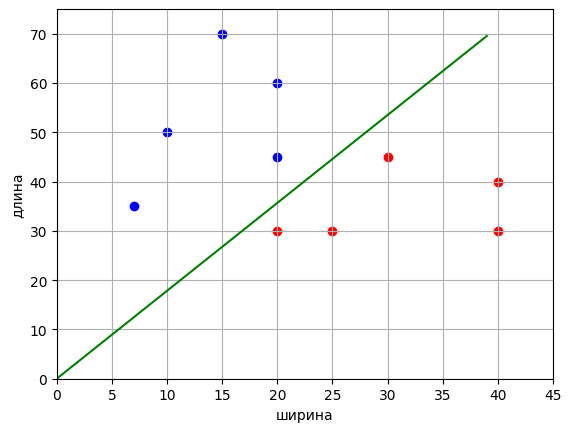

In [ ]:
line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

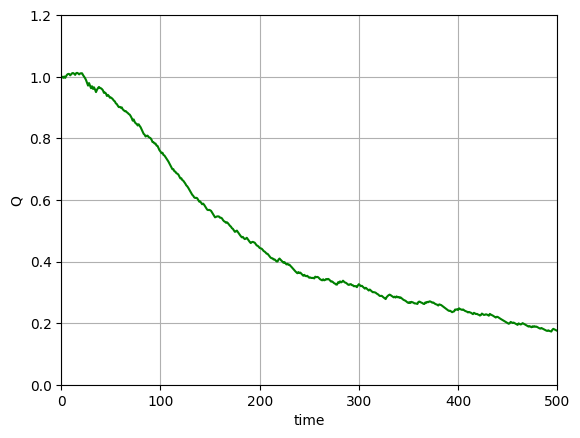

In [ ]:
line_x = [i for i in range(N+1)]  # формирование графика разделяющей линии
line_y = np.array(Q_plot)

plt.plot(line_x, line_y, color='green')

plt.xlim([0, N])
plt.ylim([0, 1.2])
plt.ylabel("Q")
plt.xlabel("time")
plt.grid(True)
plt.show()